**Author:** Priyadharsshini Sakrapani

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import geopandas
from matplotlib.colors import ListedColormap
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [159]:
# Loading necessary files
fuel_df = pd.read_csv('fuel-efficiency.csv')
canada = gpd.read_file("canada.shp")
students = pd.read_csv("students.csv")
univ = gpd.read_file('universities.geojson')
canada = gpd.read_file('canada.shp')


##### This code calculates the average fuel efficiency and creates a line plot using Plotly library. The plot shows the monthly fuel efficiency for a year. It uses a polar coordinate system to display the data. The efficiency data is converted to a list and plotted using the line_polar function of Plotly. The resulting plot shows the trend of fuel efficiency over the months of a year.

In [160]:
# Calculating average fuel efficiency
mean_efficiency = fuel_df['efficiency'].tolist()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months.append(months[0])

# Creating a Plotly plot
fig = px.line_polar(r=mean_efficiency + [mean_efficiency[0]], theta=months, line_close=True)
fig.update_traces(line_shape='spline')

fig.update_layout(polar=dict(radialaxis=dict(range=[0, 12])))
fig.show()


/Users/priyadharsshinis/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



##### This code creates a choropleth map of Canada showing the percentage of students as a proportion of the population in each province. It first plots the outline of Canada and then merges the data on student population with the geographic data. It then calculates the percentage of students in each province, assigns a color map, and plots the map with a title

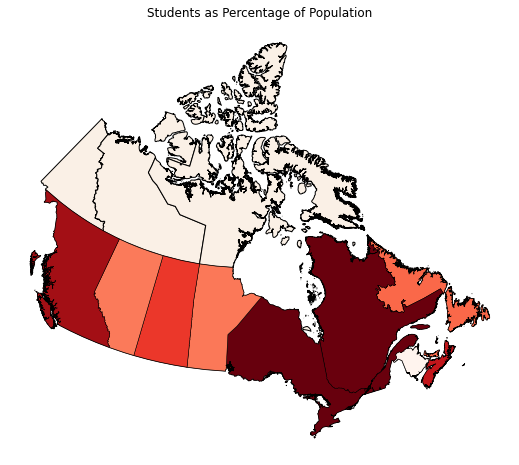

In [164]:
ax = canada.plot(color='linen',edgecolor='black', figsize=(10,8))

merged = canada.merge(students, left_on='Province', right_on='Province', how='outer')
# print(merged)
cmap = cm.get_cmap('Reds')

merged['students_percentage'] = (merged['Total students'] / merged['Population']) * 100
ax = merged.plot(column='students_percentage', cmap=cmap, edgecolor='black', linewidth=0.5, ax=ax)

# Add a title to the map
ax.set_title('Students as Percentage of Population')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
# Display the map
plt.show()


##### This code is creating a map of Canadian universities by student population using the geospatial data of the universities and the boundaries of the Canadian provinces. The geodetic system is adjusted and the map is created with two different axes, one for the full map and another one zoomed in on the province of Ontario. The universities are represented as points with size proportional to their student population, and the provinces are colored with a light yellow color. The province of Ontario is highlighted with a zoomed-in map, where the universities are also represented as points with size proportional to their student population

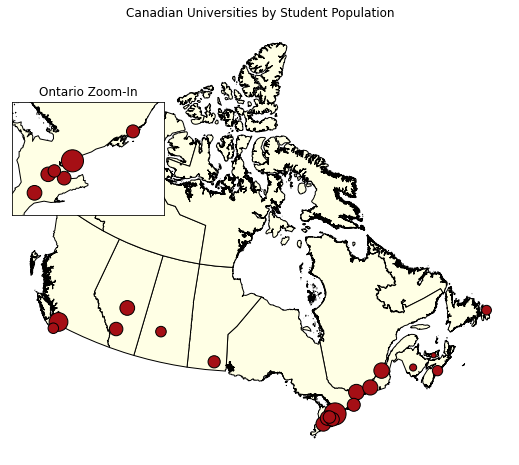

In [156]:
# Adjust geodetic sys
univ = univ.to_crs(epsg=3347)

southern_ontario = canada.loc[canada['Province'] == 'Ontario']
bbox = univ.loc[univ['Province'] == 'Ontario'].total_bounds
# print(bbox)
bbox = (bbox[0]-80000, bbox[1] - 80000, bbox[2] + 80000, bbox[3]-40000)
# print(bbox)

# Create main plot
ax = canada.plot(color='#FFFFE5',edgecolor='black', figsize=(10,8))
ax = univ.plot(markersize=univ['Total students']/200,color='#A50F15', edgecolor='black', ax=ax)
ax.set_title('Canadian Universities by Student Population')

# Create the zoomed data
ax1 = inset_axes(ax, width="30%", height="60%", loc='upper left')
ax1 = southern_ontario.plot(color='#FFFFE5', edgecolor='black', ax=ax1)
ontario = univ[univ['Province'] == 'Ontario']
ax1 = ontario.plot(markersize=ontario['Total students']/200, color='#A50F15', edgecolor='black', ax=ax1)

ax1.set_title('Ontario Zoom-In')
ax1.set_xlim(bbox[0], bbox[2])
ax1.set_ylim(bbox[1], bbox[3])
ax1.set_xticks([])
ax1.set_yticks([])

# Remove ticks and axis labels from main axis
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()
